# Feature Selection

In [3]:
ada_parent_dir = "../"
import sys
sys.path.append(ada_parent_dir)
from ada import root_to_df, filter_region, filter_tag, drop_fakes, drop_twodim
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
import pandas as pd
from sklearn import preprocessing
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

## Definition of type of signal and region

In [4]:
data_path = "../processed_data/"
signal = "Xtohh2000_Hw"
region = "SR"
tag=2

## Loading root file to pandas dataframe

In [5]:
root_file_path = data_path + "all_2000_full.root"
df = root_to_df(root_file_path)
df =  filter_region(df,region )
df = filter_tag(df, tag)
df = drop_fakes(df) #CHECK THIS DROPPED FAKES!
df = drop_twodim(df)

## Separating data, fakes and signal

In [6]:
df_data = df[df["sample"]=="data"]
df_fakes = df[df["sample"]=="fakes"]

df_signal = df[df["sample"]==signal]

## Loading csv file $\rightarrow$ Finally working with this file

In [7]:
df_csv = pd.read_csv(data_path+"Xtohh2000.csv")
df_csv =  filter_region(df_csv,region )
df_csv = filter_tag(df_csv, tag)
display(df_csv["m_region"].value_counts())
display(df_csv["sample"].value_counts())

SR    8737
Name: m_region, dtype: int64

Xtohh2000_Hw       8560
fakes                84
Zbb                  57
Zbl                   9
ZZPw                  7
Zcc                   6
Wbb                   6
Zbc                   4
Wbl                   1
Zcl                   1
Zl                    1
ttbar_nonallhad       1
Name: sample, dtype: int64

## Generating vector of labels $y$

In [8]:
y = df_csv["sample"] == signal
display(df_csv.head())
display(df_csv.columns)

,sample,EventWeightNoXSec,EventWeight,EventNumber,m_region,m_FJNbtagJets,m_AntiBTag,m_AntiTauTag,m_FJpt,m_FJeta,...,m_dPhiFTwDT,m_dRFJwDT,m_dPhiDTwMET,m_MET,m_hhm,m_bbttpt,m_hhm_Coll,m_hhm_Eff,m_hhm_ConEff,m_hhm_ConVis
0,Xtohh2000_Hw,0.008301,0.001020,46746,SR,2,3,0,885.55927,0.104927,...,3.105514,3.216185,-0.192894,237.88724,1631.6702,263.697630,-999.0,1896.5974,1193.0669,1973.7532
4,Xtohh2000_Hw,0.009094,0.001117,47033,SR,2,2,0,855.69904,0.313113,...,2.779941,2.848176,-0.019178,485.03333,1293.4028,463.512360,-999.0,1832.4620,1597.4098,1934.0298
15,Xtohh2000_Hw,0.007525,0.000925,47483,SR,2,3,0,552.47845,-0.702952,...,3.122708,3.566858,-0.742126,104.55922,1659.8483,80.008150,-999.0,1759.5939,1056.4438,2125.3684
18,Xtohh2000_Hw,0.009422,0.001158,42700,SR,2,2,0,525.10590,-0.941433,...,3.111627,3.282524,-0.130256,166.60722,1075.3092,109.524925,-999.0,1262.3474,1561.9706,1574.2820
20,Xtohh2000_Hw,0.009115,0.001120,43588,SR,2,3,0,916.44147,-0.683193,...,3.079124,3.084862,0.416606,167.35030,1595.7611,244.283460,-999.0,1807.4701,1296.0286,1838.6957


Index(['sample', 'EventWeightNoXSec', 'EventWeight', 'EventNumber', 'm_region',
       'm_FJNbtagJets', 'm_AntiBTag', 'm_AntiTauTag', 'm_FJpt', 'm_FJeta',
       'm_FJphi', 'm_FJm', 'm_DTpt', 'm_DTeta', 'm_DTphi', 'm_DTm',
       'm_DTpt_Eff', 'm_DTeta_Eff', 'm_DTphi_Eff', 'm_DTm_Eff',
       'm_DTpt_ConEff', 'm_DTeta_ConEff', 'm_DTphi_ConEff', 'm_DTm_ConEff',
       'm_DTpt_ConVis', 'm_DTeta_ConVis', 'm_DTphi_ConVis', 'm_DTm_ConVis',
       'm_dPhiFTwDT', 'm_dRFJwDT', 'm_dPhiDTwMET', 'm_MET', 'm_hhm',
       'm_bbttpt', 'm_hhm_Coll', 'm_hhm_Eff', 'm_hhm_ConEff', 'm_hhm_ConVis'],
      dtype='object')

In [9]:
features=['m_FJpt','m_FJeta', 'm_FJphi', 'm_FJm', 'm_DTpt', 'm_DTeta', 'm_DTphi', 
          'm_DTm','m_dPhiFTwDT', 'm_dRFJwDT', 'm_dPhiDTwMET', 'm_MET', 'm_hhm',
          'm_bbttpt']
print("Number of features", len(features))

Number of features 14


## Dataframe with the previous features

In [10]:
df = df_csv[features]



In [11]:
df.head()

,m_FJpt,m_FJeta,m_FJphi,m_FJm,m_DTpt,m_DTeta,m_DTphi,m_DTm,m_dPhiFTwDT,m_dRFJwDT,m_dPhiDTwMET,m_MET,m_hhm,m_bbttpt
0,885.55927,0.104927,-2.448576,127604.30,623.22710,-0.731510,0.656939,85368.720,3.105514,3.216185,-0.192894,237.88724,1631.6702,263.697630
4,855.69904,0.313113,-1.859287,122862.90,449.37933,-0.306591,0.920655,55754.656,2.779941,2.848176,-0.019178,485.03333,1293.4028,463.512360
15,552.47845,-0.702952,-2.549875,109091.67,631.70496,1.020756,0.610602,76213.550,3.122708,3.566858,-0.742126,104.55922,1659.8483,80.008150
18,525.10590,-0.941433,-1.130162,82382.28,416.48105,0.103909,1.981465,58332.793,3.111627,3.282524,-0.130256,166.60722,1075.3092,109.524925
20,916.44147,-0.683193,1.804695,115936.01,677.16440,-0.495132,-1.274429,94135.960,3.079124,3.084862,0.416606,167.35030,1595.7611,244.283460


In [12]:
df.columns

Index(['m_FJpt', 'm_FJeta', 'm_FJphi', 'm_FJm', 'm_DTpt', 'm_DTeta', 'm_DTphi',
       'm_DTm', 'm_dPhiFTwDT', 'm_dRFJwDT', 'm_dPhiDTwMET', 'm_MET', 'm_hhm',
       'm_bbttpt'],
      dtype='object')

## $Y$ vector: $0 \rightarrow$ background, $1 \rightarrow$  signal

In [13]:
Y = y.to_numpy(dtype=int)
print(Y)

[1 1 1 ... 0 0 0]


## $X$ matrix with data

In [14]:
X = df.values
print(X)

[[ 8.8555927e+02  1.0492674e-01 -2.4485755e+00 ...  2.3788724e+02
   1.6316702e+03  2.6369763e+02]
 [ 8.5569904e+02  3.1311333e-01 -1.8592868e+00 ...  4.8503333e+02
   1.2934028e+03  4.6351236e+02]
 [ 5.5247845e+02 -7.0295170e-01 -2.5498753e+00 ...  1.0455922e+02
   1.6598483e+03  8.0008150e+01]
 ...
 [ 7.7756586e+02  1.1878972e+00 -2.5713952e+00 ...  7.7403076e+01
   1.1457860e+03  5.1661566e+02]
 [ 3.5345984e+02  9.7673905e-01 -3.1318066e+00 ...  4.2421673e+01
   8.0340930e+02  8.9133310e+01]
 [ 6.4546620e+02 -5.6686050e-01  1.2123379e+00 ...  2.1359639e+02
   1.1137911e+03  3.1636932e+02]]


## Scaled $X$

In [15]:
mm_scaler = preprocessing.MinMaxScaler()
X_scaled = mm_scaler.fit_transform(X)


print(X_scaled[:,0])

[0.44491035 0.42209011 0.19035826 ... 0.36237799 0.03826124 0.26142278]


## Covariance matrix

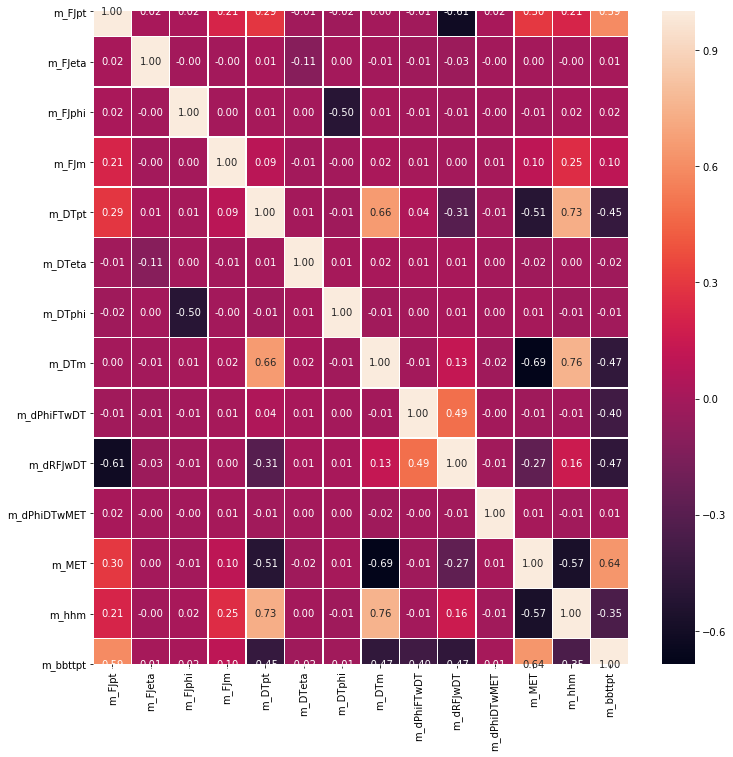

In [18]:

f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)





In [19]:
def print_ranking(X, importances):
    indices = np.argsort(importances)[::-1]
    # Print the feature ranking
    print("Feature ranking:")
    for f in range(X.shape[1]):
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))



## Training data

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = 0.2)
print(X_train.shape)
print(Y_train.shape)
print(Y_train)

(6989, 14)
(6989,)
[1 1 1 ... 1 1 1]


## $\chi^2$ test for feature selection

In [21]:
#https://towardsdatascience.com/chi-square-test-for-feature-selection-in-machine-learning-206b1f0b8223
stats, pvals = chi2(X_train,Y_train)

In [22]:
stats

array([9.06724140e+00, 1.27641226e-03, 3.87322921e-04, 1.22085508e-02,
       6.05439804e+00, 2.67826887e-01, 7.88715877e-02, 1.34227889e-02,
       4.45509794e-02, 4.50155302e-02, 6.85593583e-05, 4.99460105e+00,
       8.49133961e+00, 3.27777922e+00])

In [23]:
pvals

array([0.00260229, 0.97150011, 0.98429823, 0.91201895, 0.0138717 ,
       0.60479325, 0.77883246, 0.90776607, 0.83283185, 0.83197547,
       0.99339355, 0.02542651, 0.00356841, 0.07022389])

In [24]:
print_ranking(X,pvals)

Feature ranking:
1. feature 10 (0.993394)
2. feature 2 (0.984298)
3. feature 1 (0.971500)
4. feature 3 (0.912019)
5. feature 7 (0.907766)
6. feature 8 (0.832832)
7. feature 9 (0.831975)
8. feature 6 (0.778832)
9. feature 5 (0.604793)
10. feature 13 (0.070224)
11. feature 11 (0.025427)
12. feature 4 (0.013872)
13. feature 12 (0.003568)
14. feature 0 (0.002602)


In [25]:
p_values = pd.Series(pvals,index = df.columns)
p_values.sort_values(ascending = False , inplace = True)

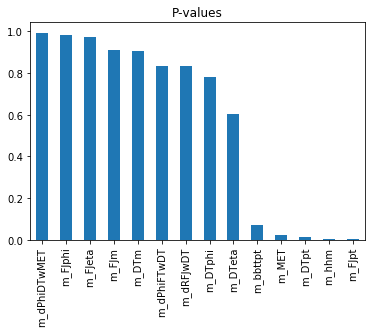

In [26]:
plt.figure()
p_values.plot.bar()
plt.title("P-values")
plt.show()

Feature ranking:
1. feature 0 (9.067241)
2. feature 12 (8.491340)
3. feature 4 (6.054398)
4. feature 11 (4.994601)
5. feature 13 (3.277779)
6. feature 5 (0.267827)
7. feature 6 (0.078872)
8. feature 9 (0.045016)
9. feature 8 (0.044551)
10. feature 7 (0.013423)
11. feature 3 (0.012209)
12. feature 1 (0.001276)
13. feature 2 (0.000387)
14. feature 10 (0.000069)


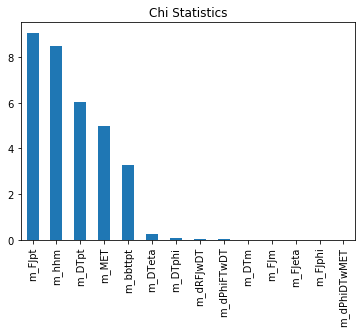

In [27]:
print_ranking(X,stats)
s_vals = pd.Series(stats, index=df.columns)
s_vals.sort_values(ascending = False , inplace = True)

plt.figure()
plt.title("Chi Statistics")
s_vals.plot.bar()
plt.show()

## Decision Trees-based Feature Selection

### ExtraTrees

[0.08100006 0.04588648 0.03719856 0.11629671 0.05442372 0.04842418
 0.04292295 0.09783834 0.04601263 0.06379242 0.05551763 0.06914986
 0.18558889 0.05594759]
Feature ranking:
1. feature 12 (0.185589)
2. feature 3 (0.116297)
3. feature 7 (0.097838)
4. feature 0 (0.081000)
5. feature 11 (0.069150)
6. feature 9 (0.063792)
7. feature 13 (0.055948)
8. feature 10 (0.055518)
9. feature 4 (0.054424)
10. feature 5 (0.048424)
11. feature 8 (0.046013)
12. feature 1 (0.045886)
13. feature 6 (0.042923)
14. feature 2 (0.037199)


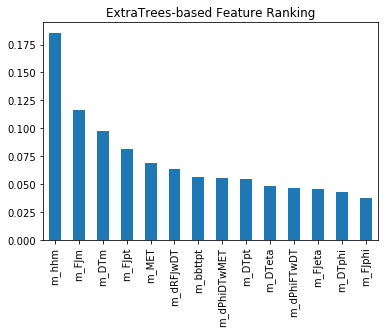

In [28]:
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X_train, Y_train)

print(clf.feature_importances_)
print_ranking(X, clf.feature_importances_)

xTree_vals = pd.Series(clf.feature_importances_, index=df.columns)
xTree_vals.sort_values(ascending = False , inplace = True)

plt.figure()
plt.title("ExtraTrees-based Feature Ranking")
xTree_vals.plot.bar()
plt.show()


In [29]:
#https://blog.datadive.net/selecting-good-features-part-iii-random-forests/

### Random Forest based

/Users/rpezoa/opt/anaconda3/envs/my_root_env/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Feature ranking:
1. feature 12 (0.245642)
2. feature 3 (0.113880)
3. feature 7 (0.097742)
4. feature 0 (0.075171)
5. feature 9 (0.069687)
6. feature 11 (0.066923)
7. feature 10 (0.053619)
8. feature 5 (0.046023)
9. feature 13 (0.041988)
10. feature 4 (0.041067)
11. feature 2 (0.039973)
12. feature 1 (0.039783)
13. feature 8 (0.035532)
14. feature 6 (0.032969)


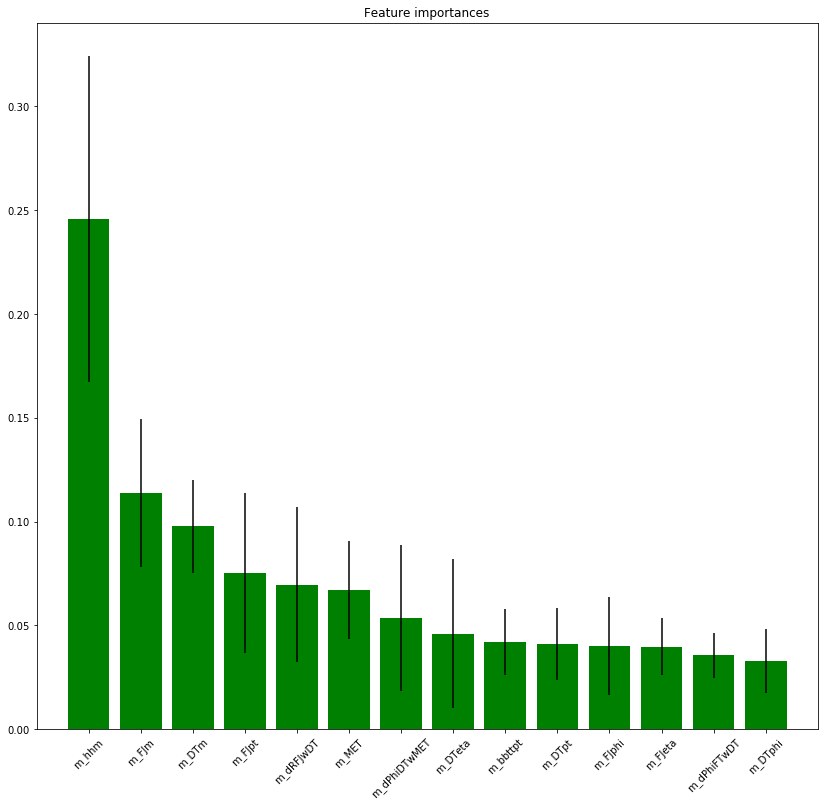

In [30]:
#https://www.kaggle.com/kanncaa1/feature-selection-and-data-visualization#Feature-Selection-and-Random-Forest-Classification

clf_rf_5 = RandomForestClassifier() 
clr_rf_5 = clf_rf_5.fit(X_train,Y_train)

importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf_5.estimators_],
             axis=0)

print_ranking(X, importances)
# Plot the feature importances of the forest

indices = np.argsort(importances)[::-1]
plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), df.columns[indices],rotation=45)
plt.xlim([-1, X.shape[1]])
plt.show()